In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("deliveries.csv")
df_copy=df

In [3]:
df.head()
df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed'],
      dtype='object')

In [4]:
columns_to_keep = ['match_id', 'venue','batting_team', 'bowling_team','striker', 'bowler', 'runs_off_bat','extras','wicket_type']
df_selected = df[columns_to_keep]

In [5]:
selected_entries = df_selected[df['bowler'] == 'TA Boult']

df_bowler = pd.DataFrame(selected_entries)

df_bowler.reset_index(drop=True, inplace=True)
df_bowler

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,DJ Malan,TA Boult,1,0,NaN
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN
...,...,...,...,...,...,...,...,...,...
397,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,4,0,NaN
398,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,1,0,NaN
399,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,H Klaasen,TA Boult,1,0,NaN
400,32,"Maharashtra Cricket Association Stadium, Pune",South Africa,New Zealand,DA Miller,TA Boult,1,0,NaN


In [6]:
match_id_column = 'match_id'
batting_team_column = 'batting_team'
bowling_team_column = 'bowling_team'
striker_column = 'striker'
bowler_column = 'bowler'
runs_off_bat_column = 'runs_off_bat'
extras_column = 'extras'

unique_bowlers = df[bowler_column].unique()
bowler_data = {}
for bowler in unique_bowlers:
    bowler_data[bowler] = df[df[bowler_column] == bowler][[match_id_column, batting_team_column, bowling_team_column, striker_column, bowler_column, runs_off_bat_column, extras_column]]

# Access the data for a specific bowler (replace 'BowlerName' with the actual bowler name)
specific_bowler_data = bowler_data.get('TA Boult', pd.DataFrame())

# If you want to reset the index of each bowler's DataFrame
for bowler, data in bowler_data.items():
    data.reset_index(drop=True, inplace=True)

# Display the data for a specific bowler
print(specific_bowler_data)

     match_id  batting_team bowling_team      striker    bowler  runs_off_bat  \
0           1       England  New Zealand  JM Bairstow  TA Boult             0   
1           1       England  New Zealand  JM Bairstow  TA Boult             6   
2           1       England  New Zealand  JM Bairstow  TA Boult             1   
3           1       England  New Zealand     DJ Malan  TA Boult             1   
4           1       England  New Zealand  JM Bairstow  TA Boult             4   
..        ...           ...          ...          ...       ...           ...   
397        32  South Africa  New Zealand    DA Miller  TA Boult             4   
398        32  South Africa  New Zealand    DA Miller  TA Boult             1   
399        32  South Africa  New Zealand    H Klaasen  TA Boult             1   
400        32  South Africa  New Zealand    DA Miller  TA Boult             1   
401        32  South Africa  New Zealand    H Klaasen  TA Boult             6   

     extras  
0         0  

In [7]:
#Scraping batsman data
from bs4 import BeautifulSoup
import requests
url = 'https://www.espncricinfo.com/records/tournament/bowling-best-career-economy-rate/icc-cricket-world-cup-2023-24-15338'
response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

x = soup.find_all('table')[0]
# print(len(x))
y = x.find_all('tr')
df_economy = []
for i in y:
  temp = []
  for j in i.find_all('td'):
    #  print(j.text,end=" ")
    temp.append(j.text)
  df_economy.append(temp)
df_economy=pd.DataFrame(df_economy)

def extract_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
df_economy.columns = df_economy.iloc[0]
df_economy = df_economy.reindex(df_economy.index.drop(0))

# # Apply the function to the specified column
df_economy['Player'] = df_economy['Player'].apply(lambda x: extract_first_two_words(x))
merged_df = pd.merge(df_selected, df_economy, left_on='bowler', right_on='Player', how='inner')
merged_df = merged_df.drop(columns = ['Player','Span'])

merged_df = merged_df.rename(columns={'Ave':'Ave_bowl' , 'Runs':'Runs_given','SR':'SR_bowl','Mat':'Mat_bowl'})
merged_df.columns


Index(['match_id', 'venue', 'batting_team', 'bowling_team', 'striker',
       'bowler', 'runs_off_bat', 'extras', 'wicket_type', 'Mat_bowl', 'Overs',
       'Mdns', 'Balls', 'Runs_given', 'Wkts', 'BBI', 'Ave_bowl', 'Econ',
       'SR_bowl', '4', '5', '10'],
      dtype='object')

EDA for Bowler-Centric Analysis:

In [8]:
print(merged_df.describe())
print(merged_df.info())

           match_id  runs_off_bat        extras  wicket_type
count  14513.000000  14513.000000  14513.000000        411.0
mean      16.425550      0.894577      0.044305          1.0
std        9.201236      1.397221      0.281322          0.0
min        1.000000      0.000000      0.000000          1.0
25%        8.000000      0.000000      0.000000          1.0
50%       17.000000      0.000000      0.000000          1.0
75%       25.000000      1.000000      0.000000          1.0
max       32.000000      6.000000      5.000000          1.0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14513 entries, 0 to 14512
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   match_id      14513 non-null  int64  
 1   venue         14513 non-null  object 
 2   batting_team  14513 non-null  object 
 3   bowling_team  14513 non-null  object 
 4   striker       14513 non-null  object 
 5   bowler        14513 non-null  object

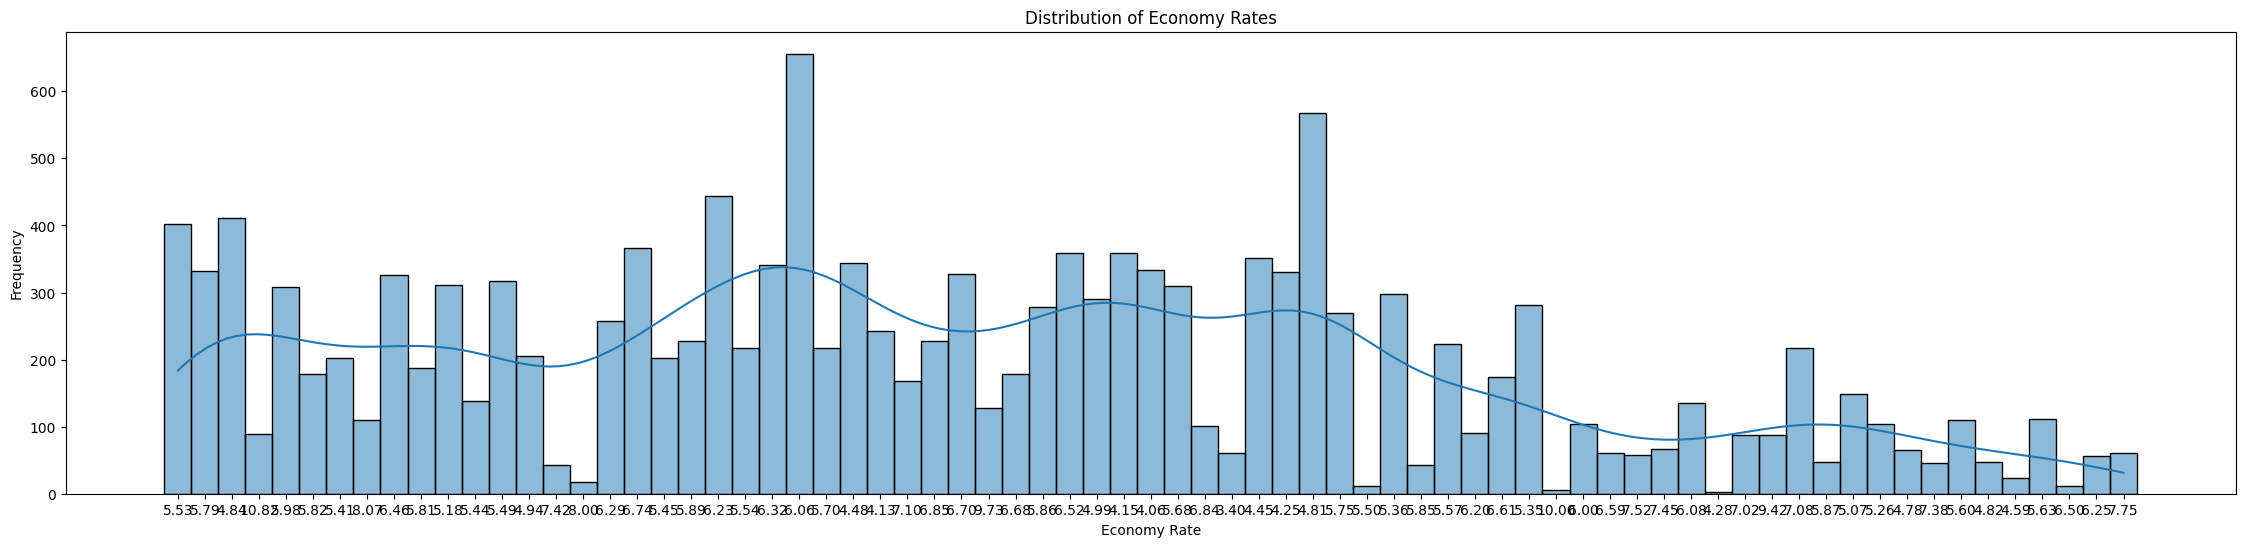

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(28, 6))
sns.histplot(merged_df['Econ'], bins=20, kde=True)
plt.title('Distribution of Economy Rates')
plt.xlabel('Economy Rate')
plt.ylabel('Frequency')
plt.show()


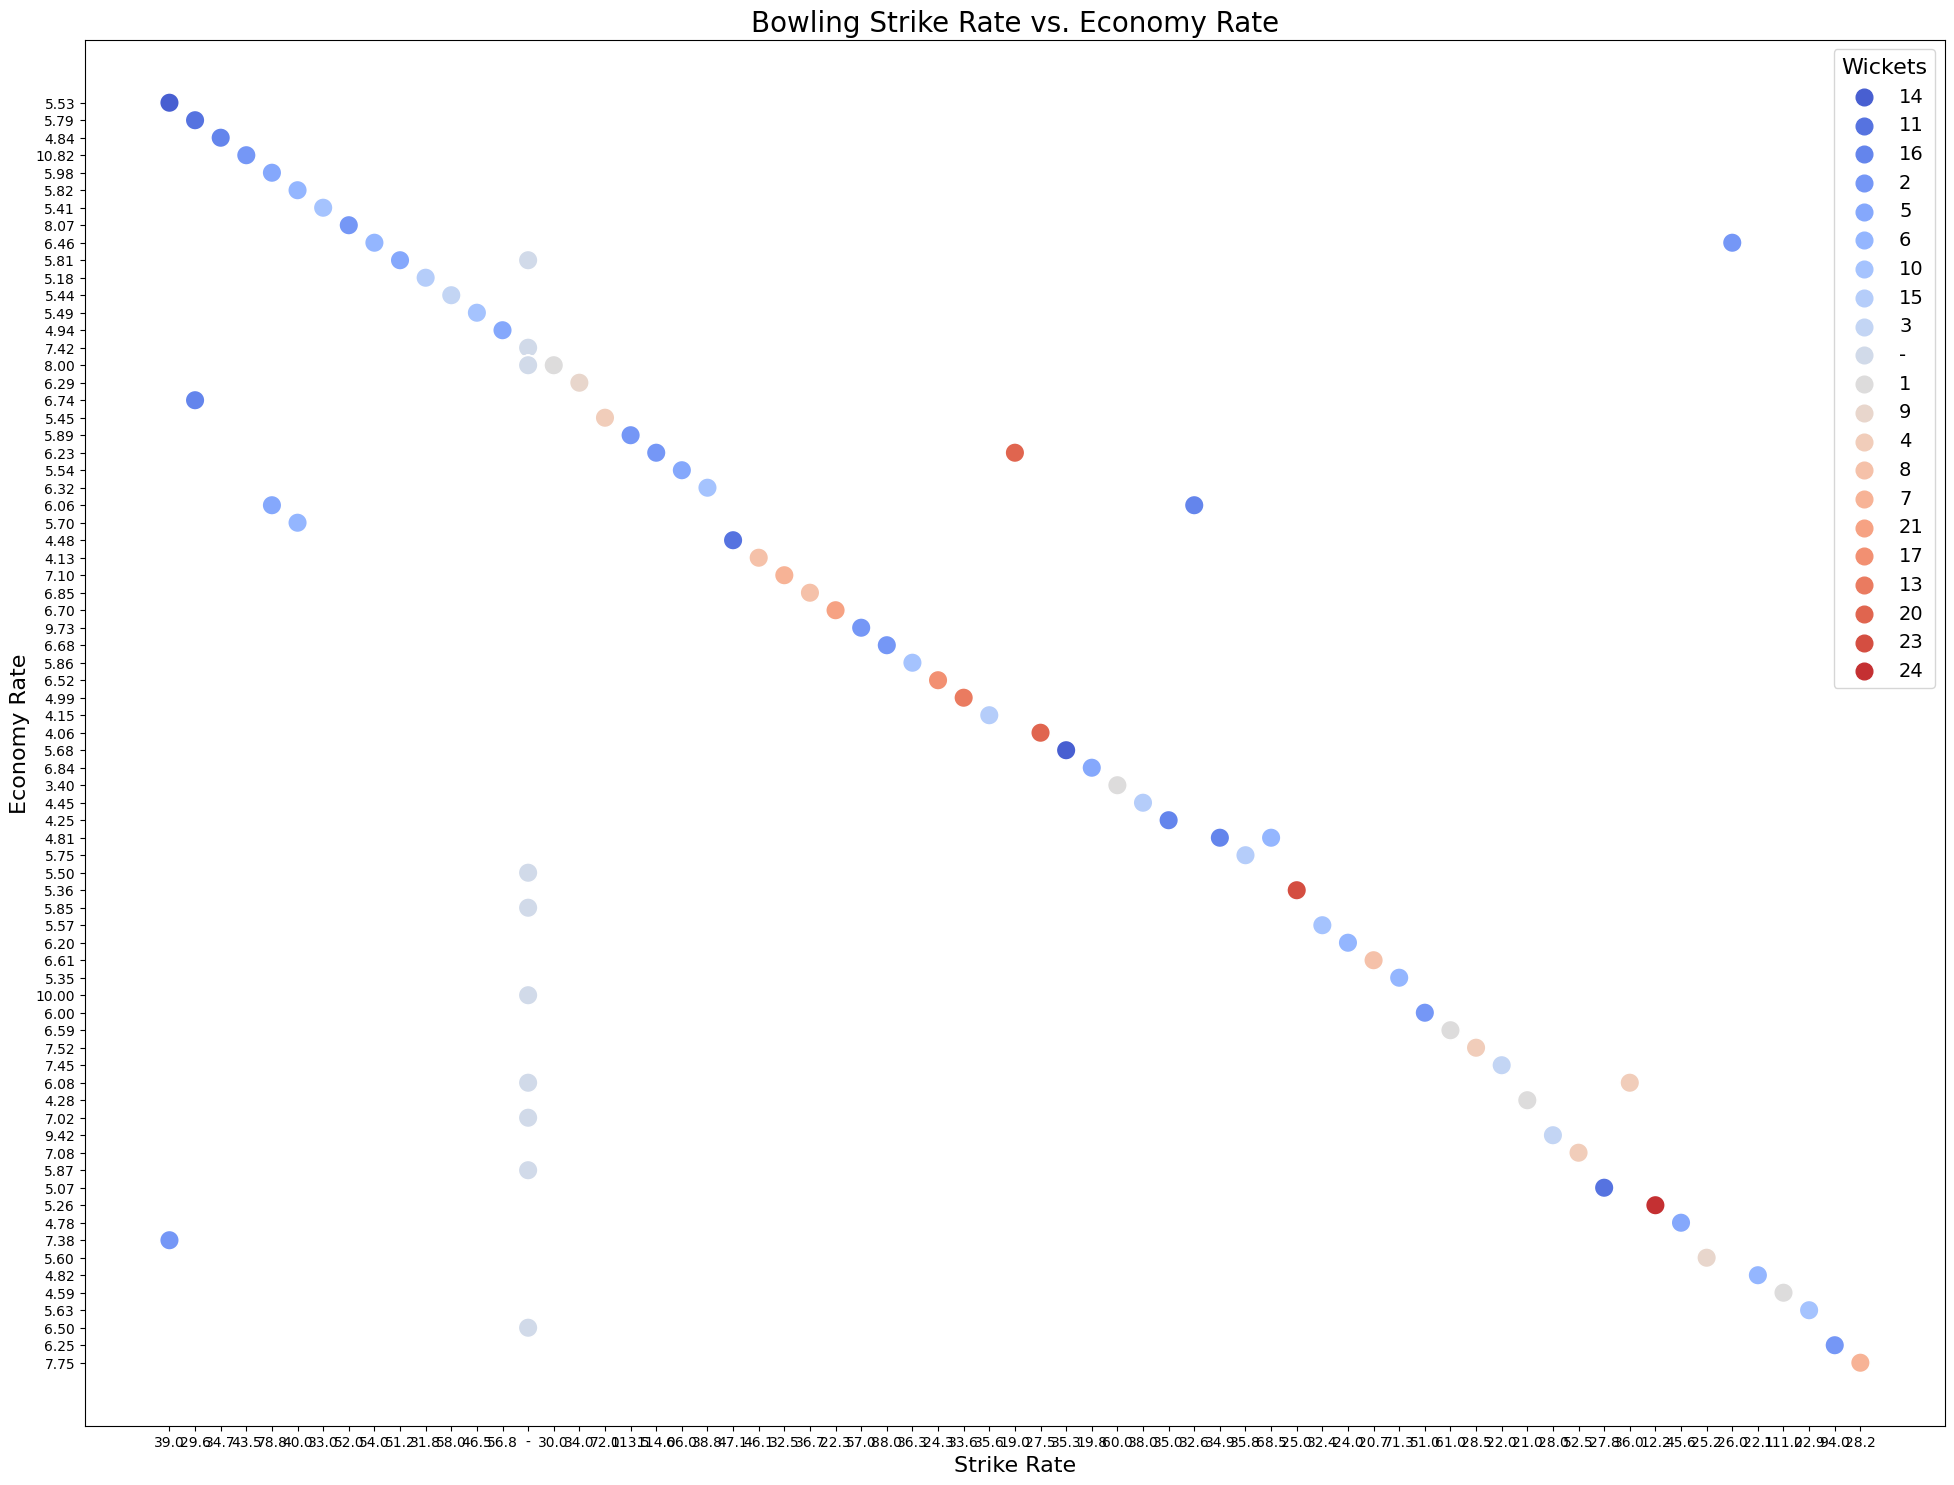

In [10]:
plt.figure(figsize=(24, 18))
scatter = sns.scatterplot(x='SR_bowl', y='Econ', data=merged_df, hue='Wkts', palette='coolwarm', s=200) # Adjust s for dot size

plt.title('Bowling Strike Rate vs. Economy Rate', fontsize=20)
plt.xlabel('Strike Rate', fontsize=16)
plt.ylabel('Economy Rate', fontsize=16)

# Resize the legend
plt.legend(title='Wickets', fontsize=14, title_fontsize=16, markerscale=2) # Adjust markerscale for legend marker size

plt.show()



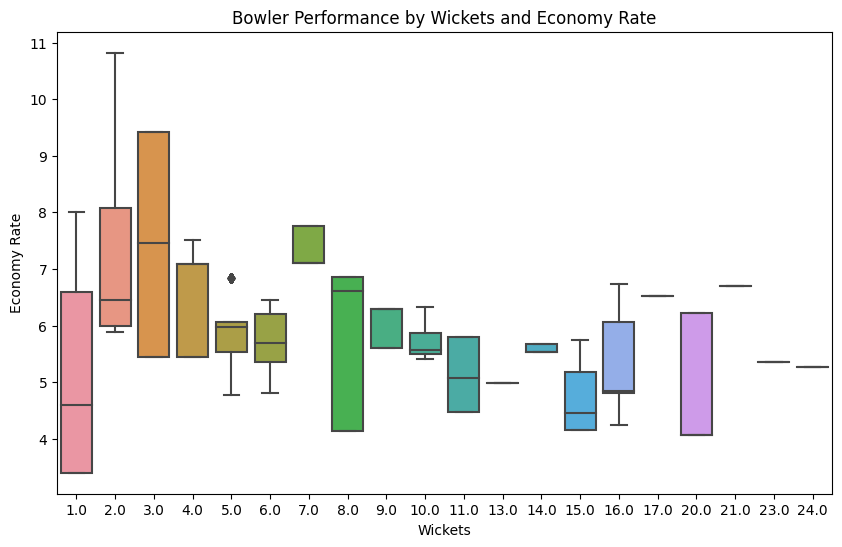

In [11]:
# Convert 'Wkts' and 'Econ' columns to numeric (if not already numeric)
merged_df['Wkts'] = pd.to_numeric(merged_df['Wkts'], errors='coerce')
merged_df['Econ'] = pd.to_numeric(merged_df['Econ'], errors='coerce')

# Drop rows with NaN values in 'Wkts' or 'Econ' (if any)
merged_df = merged_df.dropna(subset=['Wkts', 'Econ'])

plt.figure(figsize=(10, 6))
sns.boxplot(x='Wkts', y='Econ', data=merged_df)
plt.title('Bowler Performance by Wickets and Economy Rate')
plt.xlabel('Wickets')
plt.ylabel('Economy Rate')
plt.show()


<ipython-input-12-a83ce528690f>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = merged_df.corr()


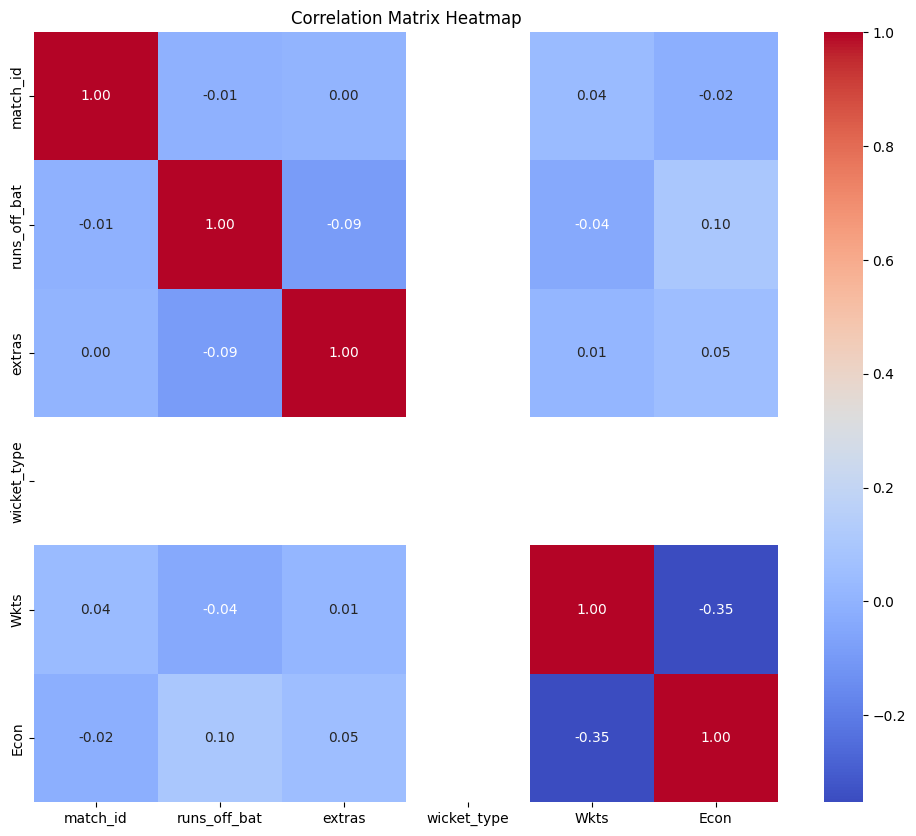

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = merged_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [13]:
url = 'https://www.espncricinfo.com/records/tournament/batting-highest-career-batting-average/icc-cricket-world-cup-2023-24-15338'

response = requests.get(url)

soup = BeautifulSoup(response.text, "html.parser")

x = soup.find_all('table')[0]
# print(len(x))
y = x.find_all('tr')
df_batsman = []
for i in y:
  temp = []
  for j in i.find_all('td'):
    #  print(j.text,end=" ")
    temp.append(j.text)
  df_batsman.append(temp)
df_batsman=pd.DataFrame(df_batsman)

def extract_first_two_words(text):
    words = text.split()
    return ' '.join(words[:2])
df_batsman.columns = df_batsman.iloc[0]
df_batsman = df_batsman.reindex(df_batsman.index.drop(0))
# # # Apply the function to the specified column
df_batsman['Player'] = df_batsman['Player'].apply(lambda x: extract_first_two_words(x))
merged_df = pd.merge(merged_df, df_batsman, left_on='striker', right_on='Player', how='inner')
merged_df = merged_df.drop(columns = ['Player','Span'])
merged_df
# df_batsman

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Runs,HS,Ave,BF,SR,100,50,0,4s,6s
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,215,59,23.88,243,88.47,-,2,1,27,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10920,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,0,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
10921,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,1,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
10922,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,1,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0
10923,5,"MA Chidambaram Stadium, Chepauk, Chennai",Australia,India,C Green,RA Jadeja,0,0,NaN,11,...,63,47,21.00,83,75.90,-,-,-,6,0


In [14]:
merged_df.to_csv('output.csv', index=False)

In [15]:
# # Assuming your dataset is stored in a DataFrame named 'df'
# # You can load your dataset using pd.read_csv or another appropriate method
team1 = 'New Zealand'
team2 = 'India'
# Extract data for the specific match between IND and AUS
# a_vs_b_match = merged_df[(merged_df['batting_team'].isin([team1, team2])) & (merged_df['bowling_team'].isin([team1, team2]))]

# Create a binary column 'is_dot_ball' indicating whether the run_off_bat is 0 (dot ball) or not
merged_df['is_dot_ball'] = (merged_df['runs_off_bat'] == 0)
dot_balls_count = merged_df.groupby('bowler')['is_dot_ball'].sum().reset_index()
dot_balls_count =  dot_balls_count.rename(columns = {'bowler':'temp', 'is_dot_ball':'dots'})
dot_balls_count
merged_df = pd.merge(merged_df, dot_balls_count, left_on='bowler', right_on='temp', how='inner')
merged_df = merged_df.drop(columns='temp')

<ipython-input-16-c6d5ddf2f0c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


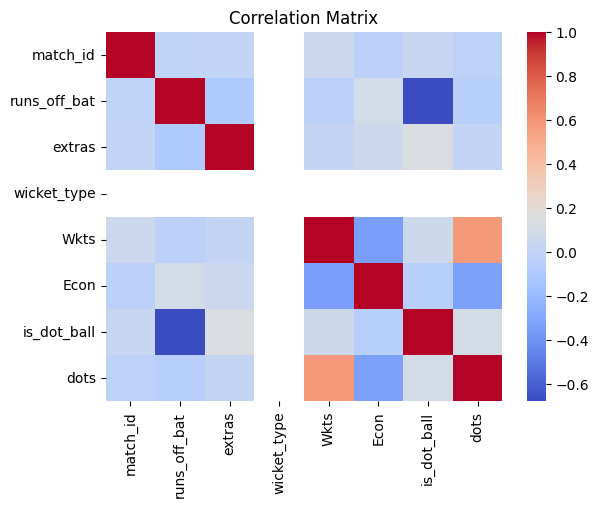

In [16]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [17]:
merged_df

,match_id,venue,batting_team,bowling_team,striker,bowler,runs_off_bat,extras,wicket_type,Mat_bowl,...,Ave,BF,SR,100,50,0,4s,6s,is_dot_ball,dots
0,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,True,167
1,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,6,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
2,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,1,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
3,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,4,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,False,167
4,1,"Narendra Modi Stadium, Ahmedabad",England,New Zealand,JM Bairstow,TA Boult,0,0,NaN,10,...,23.88,243,88.47,-,2,1,27,3,True,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10920,2,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Netherlands,Mohammad Rizwan,Saqib Zulfiqar,1,0,NaN,2,...,65.83,414,95.41,1,1,-,38,5,False,3
10921,2,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Netherlands,Mohammad Rizwan,Saqib Zulfiqar,1,0,NaN,2,...,65.83,414,95.41,1,1,-,38,5,False,3
10922,2,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Netherlands,Mohammad Rizwan,Saqib Zulfiqar,0,0,NaN,2,...,65.83,414,95.41,1,1,-,38,5,True,3
10923,2,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Pakistan,Netherlands,Mohammad Rizwan,Saqib Zulfiqar,0,0,NaN,2,...,65.83,414,95.41,1,1,-,38,5,True,3


<ipython-input-18-c6d5ddf2f0c8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = merged_df.corr()


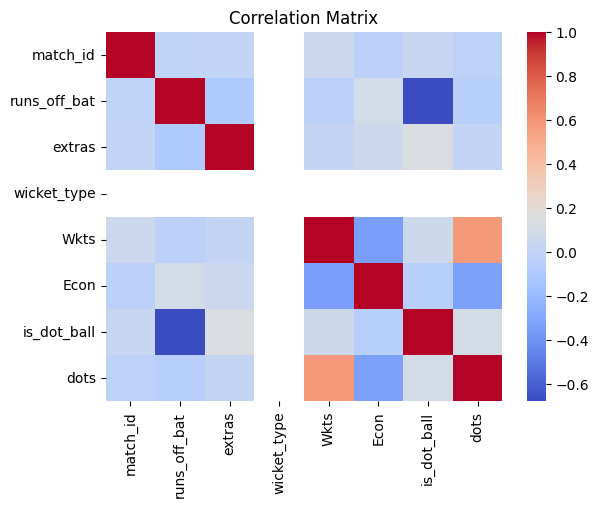

In [18]:
corr_matrix = merged_df.corr()
sns.heatmap(corr_matrix,annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [19]:
dot_balls_count = merged_df.groupby('bowler')['is_dot_ball'].sum().reset_index()

dot_balls_count = dot_balls_count.rename(columns = { 'is_dot_ball' : 'dots_count'})
# final_df = pd.merge(dot_balls_count,merged_df,left_on='bowler2',right_on='bowler',how = 'inner')
final_df = pd.merge(dot_balls_count,merged_df,on='bowler')
dot_balls_count

,bowler,dots_count
0,A Dutt,143
1,A Zampa,79
2,AAP Atkinson,25
3,AD Mathews,25
4,AK Markram,12
...,...,...
65,TA Boult,167
66,TG Southee,1
67,Taskin Ahmed,114
68,Usama Mir,67


In [20]:
df_economy

,Player,Span,Mat,Overs,Mdns,Balls,Runs,Wkts,BBI,Ave,Econ,SR,4,5,10
1,R Ashwin,2023-2023,1,10.0,1,60,34,1,1/34,34.00,3.40,60.0,-,-,-
2,JJ Bumrah,2023-2023,11,91.5,9,551,373,20,4/39,18.65,4.06,27.5,1,-,-
3,Mohammad Nabi,2023-2023,9,61.3,4,369,254,8,3/28,31.75,4.13,46.1,-,-,-
4,KA Maharaj,2023-2023,10,89.0,1,534,370,15,4/46,24.66,4.15,35.6,1,-,-
5,RA Jadeja,2023-2023,11,93.3,4,561,398,16,5/33,24.87,4.25,35.0,-,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,Agha Salman,2023-2023,3,5.0,-,30,46,-,-,-,9.20,-,-,-,-
97,Hasan Mahmud,2023-2023,2,14.0,-,84,132,3,2/67,44.00,9.42,28.0,-,-,-
98,M Pathirana,2023-2023,2,19.0,-,114,185,2,1/90,92.50,9.73,57.0,-,-,-
99,KIC Asalanka,2023-2023,9,1.0,-,6,10,-,-,-,10.00,-,-,-,-


In [21]:
final_df = pd.merge(dot_balls_count,df_economy,left_on='bowler',right_on='Player',how='inner')
final_df = final_df.astype(int, errors='ignore')
final_df = final_df.replace('-',0)


In [22]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'df' is your DataFrame
le = LabelEncoder()
df_transformed = df
for column in df_transformed.columns:
    if df_transformed[column].dtype == 'object':
        df_transformed[column] = le.fit_transform(df_transformed[column])

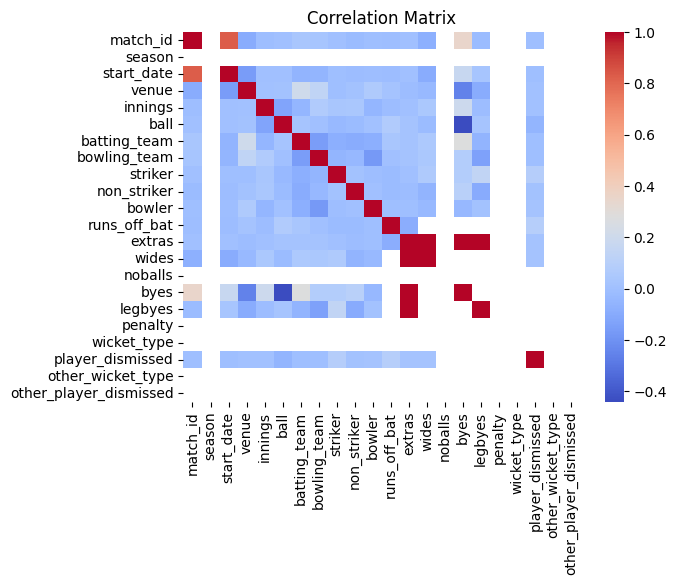

In [23]:
corr_matrix = df_transformed.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


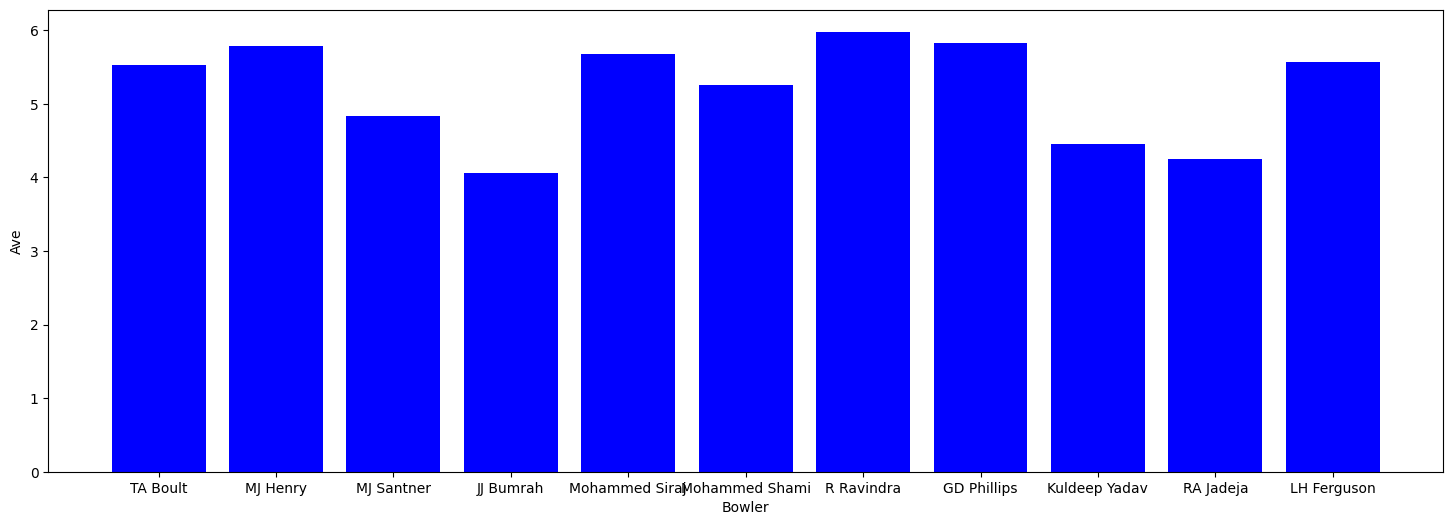

In [24]:
df_economy
team1 = 'New Zealand'
team2 = 'India'
# Extract data for the specific match between IND and AUS
a_vs_b_match = merged_df[(merged_df['batting_team'].isin([team1, team2])) & (merged_df['bowling_team'].isin([team1, team2]))]
df_unique = a_vs_b_match.drop_duplicates(subset=['bowler'])
df_unique
plt.figure(figsize=(18, 6))
plt.bar(df_unique['bowler'], df_unique['Econ'], color='blue')

# Add labels and title
plt.xlabel('Bowler')
plt.ylabel('Ave')
# Show the plot
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,r2_score


features = ['Runs','Wkts','Econ','Ave','SR','Mdns','dots_count','Balls']
data = final_df[features]


X_train, X_test, y_train, y_test = train_test_split(data.drop('dots_count', axis=1), data['dots_count'], test_size=0.2, random_state=42)

# Train a RandomForestRegressor (since it's a regression problem)
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) instead of accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r_squared = r2_score(y_test, y_pred)
print(f"R2 score: {r_squared}")
import pickle
pickle_rfc = open("most_dots_bowler.pkl","wb")
pickle.dump(regressor, pickle_rfc)
pickle_rfc.close()

regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) instead of accuracy
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
r_squared = r2_score(y_test, y_pred)
print(f"R2 score: {r_squared}")



Mean Absolute Error: 10.644285714285715
R2 score: 0.912992964397926
Mean Absolute Error: 17.020733605531458
R2 score: 0.7715366186701257


Hyper-parameter Tuning

In [34]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the RandomForestRegressor
regressor = RandomForestRegressor(random_state=42)

# Create RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=regressor, param_distributions=param_grid,
                                   n_iter=100, scoring='neg_mean_absolute_error',
                                   cv=5, verbose=1, random_state=42, n_jobs=-1)

# Fit the RandomizedSearchCV to the data
random_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = random_search.best_params_
best_score = random_search.best_score_
best_regressor = random_search.best_estimator_

# Make predictions on the test set
y_pred = best_regressor.predict(X_test)

# Evaluate the model using Mean Absolute Error (MAE) and R2 score
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

# Save the best RandomForestRegressor model using pickle
with open("best_rfc_model.pkl", "wb") as pickle_rfc:
    pickle.dump(best_regressor, pickle_rfc)

print(f"Best Parameters: {best_params}")
print(f"Best Mean Absolute Error: {-best_score}")

print(f"RandomForestRegressor - Mean Absolute Error: {mae}")
print(f"RandomForestRegressor - R2 score: {r_squared}")



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 20}
Best Mean Absolute Error: 17.62961402193947
RandomForestRegressor - Mean Absolute Error: 12.020363857149821
RandomForestRegressor - R2 score: 0.8768894926970107


In [46]:
batsman_name = ""
batsman_dots = 0
import warnings
warnings.filterwarnings('ignore')
# print(final_df_batsman.iloc[5]['Runs'])
n = len(final_df)
# print(n)
features = ['Runs','Wkts','Econ','Ave','SR','Mdns','Balls']
for i in range(0,n):
  data = [final_df.iloc[i][features]]
  y = best_regressor.predict(data)
  # print(y)
  if batsman_dots < y:
    batsman_name = final_df.iloc[i]['Player']
    batsman_dots = y
print(batsman_name)

M Jansen


In [53]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Assuming 'final_df_batsman' contains your data
features = ['Runs','Wkts','Econ','Ave','SR','Mdns','dots_count','Balls']
data = final_df[features]

X_train, X_test, y_train, y_test = train_test_split(data.drop('dots_count', axis=1), data['dots_count'],
                                                    test_size=0.2, random_state=42)

# Convert to TensorFlow tensors
X_train_tf = tf.convert_to_tensor(X_train.values, dtype=tf.float32)
y_train_tf = tf.convert_to_tensor(y_train.values.reshape(-1, 1), dtype=tf.float32)

# Creating a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(len(features) - 1,), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train_tf, y_train_tf, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
X_test_tf = tf.convert_to_tensor(X_test.values, dtype=tf.float32)
y_pred = model.predict(X_test_tf)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 score: {r_squared}")

# Save the model
model.save("neural_network_model.h5")


Epoch 1/50
2/2 [==============================] - 1s 396ms/step - loss: 17895.2793 - mae: 116.7242 - mse: 17895.2793 - val_loss: 14807.3311 - val_mae: 101.7680 - val_mse: 14807.3311
Epoch 2/50
2/2 [==============================] - 0s 136ms/step - loss: 15845.5508 - mae: 109.2535 - mse: 15845.5508 - val_loss: 13031.8877 - val_mae: 94.6746 - val_mse: 13031.8877
Epoch 3/50
2/2 [==============================] - 0s 73ms/step - loss: 13955.2061 - mae: 101.9204 - mse: 13955.2061 - val_loss: 11522.1611 - val_mae: 88.1505 - val_mse: 11522.1611
Epoch 4/50
2/2 [==============================] - 0s 72ms/step - loss: 12361.5537 - mae: 95.0426 - mse: 12361.5537 - val_loss: 10191.9062 - val_mae: 82.0133 - val_mse: 10191.9062
Epoch 5/50
2/2 [==============================] - 0s 77ms/step - loss: 10951.3623 - mae: 88.7281 - mse: 10951.3623 - val_loss: 9001.3350 - val_mae: 76.2654 - val_mse: 9001.3350
Epoch 6/50
2/2 [==============================] - 0s 120ms/step - loss: 9744.4844 - mae: 82.9698 - ms

In [54]:
batsman_name = ""
batsman_dots = 0

for i in range(len(final_df)):
    data = final_df.iloc[i][features].values.reshape(1, -1).astype(np.float32)
    # Reshape and convert data to a NumPy array for prediction

    y = model.predict(data)
    predicted_dots = y[0][0]  # Extracting the predicted dots

    if batsman_dots < predicted_dots:
        batsman_name = final_df.iloc[i]['striker']
        batsman_dots = predicted_dots

print(batsman_name)

InvalidArgumentError: ignored

In [58]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
import pandas as pd
import numpy as np

# Assuming 'final_df_batsman' contains your data
features = ['Runs', 'Wkts', 'Econ', 'Ave', 'SR', 'Mdns', 'Balls', 'dots_count']
data = final_df[features]

# Splitting the data into features and target
X = data.drop('dots_count', axis=1)
y = data['dots_count']

# Convert to NumPy arrays
X_np = X.values.astype(np.float32)
y_np = y.values.reshape(-1, 1).astype(np.float32)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_np, y_np, test_size=0.2, random_state=42)

# Creating a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r_squared = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R2 score: {r_squared}")

# Save the model
model.save("neural_network_model.h5")

# Prediction for batsman with the most predicted dots
batsman_name = ""
batsman_dots = 0

for i in range(len(final_df)):
    data = final_df.iloc[i][features[:-1]].values.astype(np.float32).reshape(1, -1)
    # Reshape and convert data to a NumPy array for prediction

    y = model.predict(data)
    predicted_dots = y[0][0]  # Extracting the predicted dots

    if batsman_dots < predicted_dots:
        batsman_name = final_df.iloc[i]['Player']
        batsman_dots = predicted_dots

print(f"The batsman with the most predicted dots: {batsman_name}")


Epoch 1/50
2/2 [==============================] - 2s 256ms/step - loss: 18624.0117 - mae: 117.7050 - mse: 18624.0117 - val_loss: 12422.9326 - val_mae: 91.5627 - val_mse: 12422.9326
Epoch 2/50
2/2 [==============================] - 0s 36ms/step - loss: 12585.1416 - mae: 95.4734 - mse: 12585.1416 - val_loss: 7895.6362 - val_mae: 70.8410 - val_mse: 7895.6362
Epoch 3/50
2/2 [==============================] - 0s 37ms/step - loss: 8261.8555 - mae: 74.7819 - mse: 8261.8555 - val_loss: 4710.6616 - val_mae: 51.2983 - val_mse: 4710.6616
Epoch 4/50
2/2 [==============================] - 0s 53ms/step - loss: 4718.9834 - mae: 55.2093 - mse: 4718.9834 - val_loss: 2628.4233 - val_mae: 34.8523 - val_mse: 2628.4233
Epoch 5/50
2/2 [==============================] - 0s 73ms/step - loss: 2700.4194 - mae: 40.2921 - mse: 2700.4194 - val_loss: 1471.4564 - val_mae: 28.3692 - val_mse: 1471.4564
Epoch 6/50
2/2 [==============================] - 0s 76ms/step - loss: 1401.9263 - mae: 27.8781 - mse: 1401.9263 - va

1/1 [==============================] - 0s 91ms/step
Mean Absolute Error: 10.838702201843262
R2 score: 0.9279598547927526
1/1 [==============================] - 0s 24ms/step
The batsman with the most predicted dots: A Zampa
